In [1]:
import config as cfg
import botometer
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rapidapi_key = cfg.RAPIDAPI_KEY
twitter_app_auth = {
    'consumer_key': cfg.API_KEY,
    'consumer_secret': cfg.API_KEY_SECRET,
    'access_token': cfg.ACCESS_TOKEN,
    'access_token_secret': cfg.ACCESS_TOKEN_SECRET,
  }

hashtags = ["#stopsmoking", "#quitsmoking", "#smokefree"]
other_hashtags = ["#vaping", "#vape", "#health", "#smoking", "#nicotine", "#nosmoking", "#tobaccofree"]

In [3]:
xlsx_path = 'tweets_database_1500.xlsx'
data = pd.read_excel(xlsx_path, 
                  names=['HASHTAG', 'OTHER HASHTAGS', "Twitter ID", "tweet message", "retweet","location", "followers"])
excel_hashtags = data['HASHTAG'].tolist()
found_hashtags = data['OTHER HASHTAGS'].tolist()
users = data["Twitter ID"].tolist()

In [4]:

key_users = []
for i, hashtag in enumerate(hashtags):
    key_users.append([])
    print(key_users)
    for j, key in enumerate(excel_hashtags):
        print(j)
        if hashtag == key:
            key_users[i].append(users[j])
        
        

[[]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [5]:
other_users = []
for i, hashtag in enumerate(other_hashtags):
    other_users.append([])
    #print(key_users)
    for j, key in enumerate(found_hashtags):
        if isinstance(key, str):
            print("HASHTAG", hashtag, "KEY",  key)
            if hashtag in key:
                #print(hashtag, key)
                other_users[i].append(users[j])

HASHTAG #vaping KEY #vapes,#nrt,#e
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #vapes,#nrt,#e
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #antismoking
HASHTAG #vaping KEY #smokefree,#blackpool
HASHTAG #vaping KEY #smokefree,#blackpool
HASHTAG #vaping KEY #stopsmoking,#stopsmokinglaser,#quitsmoking,#smokingcessation,#laserstopsmokingnj,#stopsmokingnearme
HASHTAG #vaping KEY #stopsmoking,#stopsmokinglaser,#quitsmoking,#smokingcessation,#laserstopsmokingnj,#stopsmokingnearme
HASHTAG #vaping KEY #stopsmoking,#stopsmokinglaser,#quitsmoking,#smokingcessation,#laserstopsmokingnj,#stopsmokingnearme
HASHTAG #vaping KEY #stopsmoking,#stopsmokinglaser,#quitsmoking,#smokingcessation,#laserstopsmokingnj,#stopsmokingnearme
HASHTAG #vaping KEY #stopsmokingtools,#smokingcessation
HASHTAG #vaping KEY #nhl,#guylafleur
HASHTAG #vaping KEY #quitsmoking
HASHT

In [6]:
for other in other_users:
    print(len(other))

92
77
70
130
57
43
52


In [7]:
# BOTOMETER analysis

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

In [8]:
workbook = xlsxwriter.Workbook('bots.xlsx')
worksheet = workbook.add_worksheet()
row = 0
for i, twitter_users in enumerate(other_users):
    user = 0
    for result in bom.check_accounts_in(twitter_users):
        bot_score = 0
        if result[1]["raw_scores"]["english"]["overall"] > result[1]["raw_scores"]["universal"]["overall"]:
            bot_score = result[1]["raw_scores"]["universal"]["overall"]
        else: bot_score = result[1]["raw_scores"]["english"]["overall"]
        bot = True if bot_score >= 0.5 else False
        worksheet.write(row, 0, other_hashtags[i])
        worksheet.write(row, 1, twitter_users[user])
        worksheet.write(row, 2, bot)
        row = row + 1
        user = user + 1
        print(row, bot)

workbook.close()

1 False


KeyboardInterrupt: 

In [ ]:
workbook = xlsxwriter.Workbook('key_bots.xlsx')
worksheet = workbook.add_worksheet()
row = 0
for i, twitter_users in enumerate(key_users):
    user = 0
    for result in bom.check_accounts_in(twitter_users):
        bot_score = 0
        print(result)
        try:
            if result[1]["raw_scores"]["english"]["overall"] > result[1]["raw_scores"]["universal"]["overall"]:
                bot_score = result[1]["raw_scores"]["universal"]["overall"]
            else: bot_score = result[1]["raw_scores"]["english"]["overall"]
            bot = True if bot_score >= 0.5 else False
        
        except:
            print("NO RESULTS FOUND")
            bot = "NOT AUTHORIZED"
        
            
        worksheet.write(row, 0, hashtags[i])
        worksheet.write(row, 1, twitter_users[user])
        worksheet.write(row, 2, bot)
        row = row + 1
        user = user + 1
        print(row, bot)

workbook.close()

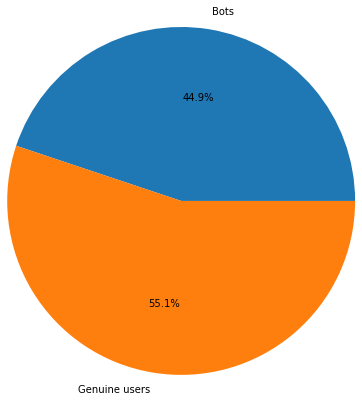

In [26]:
key_bots_path = "key_bots.xlsx"
key_bots_data = pd.read_excel(key_bots_path, 
                  names=['Hashtag', 'Bot'])

key_bots_hashtag = key_bots_data['Hashtag'].tolist()
key_whether_bots = key_bots_data['Bot'].tolist()

for i, bot in enumerate(key_whether_bots):
    if bot == 'NOT AUTHORIZED':
        key_whether_bots[i] = False

total_number_of_users = len(key_whether_bots)
total_bots = 0
for user in key_whether_bots:
    if user == True:
        total_bots = total_bots + 1
        
values = [total_bots, total_number_of_users - total_bots]
labels = ['Bots', 'Genuine users']

plt.pie(values, labels=labels, autopct='%1.1f%%', radius=2)
#plt.title("Amount of automated users in the whole database", loc="left")
plt.show()

In [52]:
bots_path = "bots.xlsx"
bots_data = pd.read_excel(bots_path, 
                  names=['Hashtags', 'Bot'])

bots_hashtags = bots_data['Hashtags'].tolist()
whether_bots = bots_data['Bot'].tolist()

for i, bot in enumerate(whether_bots):
    if bot == 'NOT AUTHORIZED':
        key_whether_bots[i] = False

bot_amounts = [0] * len(other_hashtags)
for j, hashtag in enumerate(other_hashtags):
    for i, bots_hashtag in enumerate(bots_hashtags):
        if hashtag == bots_hashtag:
            if whether_bots[i] == True:
                bot_amounts[j] = bot_amounts[j] + 1
print(bot_amounts)

key_bot_amounts = [0] * len(hashtags)
for j, hashtag in enumerate(hashtags):
    for i, key_bots_hashtag1 in enumerate(key_bots_hashtag):
        if hashtag == key_bots_hashtag1:
            if key_whether_bots[i] == True:
                key_bot_amounts[j] = key_bot_amounts[j] + 1
print(key_bot_amounts)

[45, 47, 22, 80, 51, 21, 41]
[198, 340, 113]


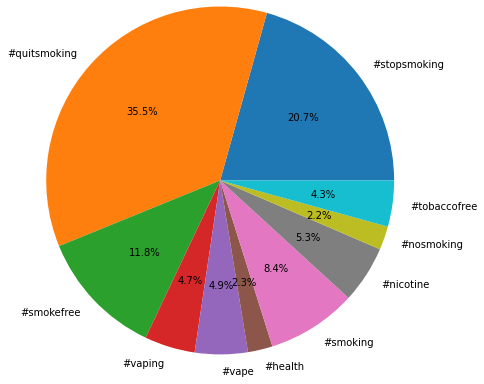

In [57]:
# percentages of different hashtags among bot messages
all_bot_amounts = key_bot_amounts + bot_amounts
all_labels = hashtags + other_hashtags

plt.pie(all_bot_amounts, labels=all_labels, autopct='%1.1f%%', radius=2)
plt.show()

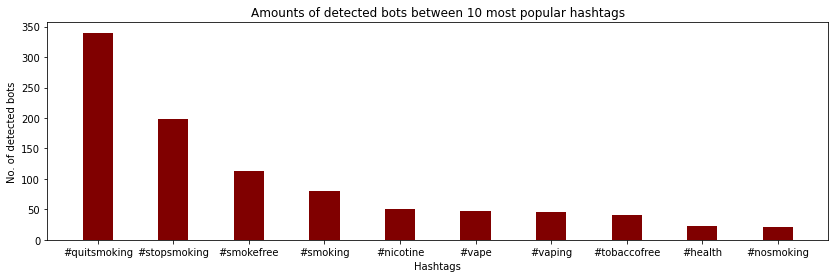

In [64]:
# sort hashtags

temp_bots = all_bot_amounts.copy()
temp_labels = all_labels.copy()
sorted_bot_values = []
sorted_hashtags = []
while len(temp_bots) != 0:
    i = temp_bots.index(max(temp_bots))
    sorted_bot_values.append(temp_bots.pop(i))
    sorted_hashtags.append(temp_labels.pop(i))

fig = plt.figure(figsize = (14, 4))
 
# creating the bar plot
plt.bar(sorted_hashtags, sorted_bot_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hashtags")
plt.ylabel("No. of detected bots")
plt.title("Amounts of detected bots between 10 most popular hashtags")
plt.show()

In [23]:
# SUPPORT FOR RETWEETS
retweet_path = "tweets_database_1500.xlsx"
retweet_data = pd.read_excel(retweet_path, 
                  names=['HASHTAG', 'OTHER HASHTAGS', "Twitter ID", "tweet message", "retweet","location", "followers"])

k = 0
retweets = retweet_data['retweet'].tolist()
main_hashtags = retweet_data['HASHTAG'].tolist()
different_hashtags = retweet_data['OTHER HASHTAGS'].tolist()
every_hashtag = []
for i, retweet in enumerate(retweets):
    if retweet == True:
        k = k +1
        every_hashtag.append(main_hashtags[i])
        try:
            temp = different_hashtags[i].split(",")
            for tag in temp:
                every_hashtag.append(tag)
        except:
            p = 1
print(k)
# 544 RETWEETTIÄ 1269 HASHTAGIA JOILLA SUPPORTTIA
print(len(every_hashtag))

        
        
        

544
1269


In [25]:
fdist=dict(zip(*np.unique(every_hashtag, return_counts=True)))

In [26]:
print(fdist)

{'#a': 1, '#alchemys': 1, '#android': 2, '#antismoking': 25, '#anxiety': 4, '#app': 2, '#awareness': 2, '#bechamp': 1, '#best': 4, '#bestejuic': 4, '#blackpool': 6, '#bornonthisday': 1, '#breathe': 1, '#cad': 28, '#cancer': 12, '#cancersurv': 3, '#cancersurvivor': 2, '#cigarettes': 1, '#cloudchasers': 8, '#costofliving': 3, '#d': 2, '#darksouls': 3, '#depre': 4, '#devices': 1, '#ditillu': 28, '#drmukharjee': 28, '#dyk': 2, '#earthday': 12, '#ecigarette': 3, '#ecigs': 1, '#edenshopping': 10, '#edenshoppingcentre': 10, '#ejuice': 8, '#eleaf': 2, '#escprev2022': 6, '#exercise': 1, '#exposure': 4, '#ezigarette': 3, '#fact': 12, '#financialresults': 1, '#freshaironair': 1, '#furywhyte': 3, '#godmorningthursday': 82, '#h': 3, '#habits': 1, '#hatecigerrate': 1, '#health': 5, '#healthy': 3, '#healthylif': 1, '#healthyrrific': 1, '#heartdisease': 35, '#heartmonth': 1, '#hypnosis': 4, '#hypnotherapy': 4, '#indians': 4, '#iphone': 2, '#jetzt': 3, '#joymy': 4, '#kabir_is_supreme_god': 41, '#kyvor'

In [27]:
type(fdist)

dict

In [34]:
sort_orders = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

[('#quitsmoking', 251), ('#stopsmoking', 243), ('#godmorningthursday', 82), ('#smokefree', 74), ('#kabir_is_supreme_god', 41), ('#heartdisease', 35), ('#vaping', 32), ('#cad', 28), ('#ditillu', 28), ('#drmukharjee', 28), ('#pulseheart', 28), ('#antismoking', 25), ('#mindfulness', 15), ('#vape', 14), ('#cancer', 12), ('#earthday', 12), ('#fact', 12), ('#edenshopping', 10), ('#edenshoppingcentre', 10), ('#vpz', 10), ('#worldparkinsonday', 10), ('#va', 9), ('#vapelife', 9), ('#cloudchasers', 8), ('#ejuice', 8), ('#vapeaddict', 8), ('#vapelove', 8), ('#vapeon', 8), ('#vaptio', 8), ('#blackpool', 6), ('#escprev2022', 6), ('#smoking', 6), ('#health', 5), ('#shisha', 5), ('#anxiety', 4), ('#best', 4), ('#bestejuic', 4), ('#depre', 4), ('#exposure', 4), ('#hypnosis', 4), ('#hypnotherapy', 4), ('#indians', 4), ('#joymy', 4), ('#ocd', 4), ('#phobias', 4), ('#subohm', 4), ('#win', 4), ('#cancersurv', 3), ('#costofliving', 3), ('#darksouls', 3), ('#ecigarette', 3), ('#ezigarette', 3), ('#furywhyte

AttributeError: 'list' object has no attribute 'items'

In [36]:
top_10_keys = []
top_10_values = []
for i in range(0, 10):
    top_10_keys.append(sort_orders[i][0])
    top_10_values.append(sort_orders[i][1])



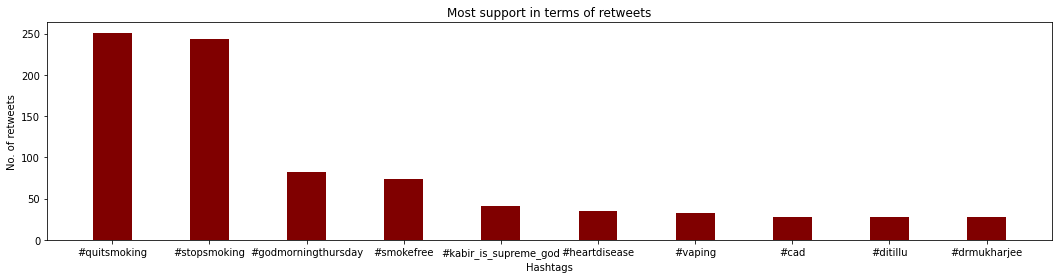

In [41]:
fig = plt.figure(figsize = (18, 4))
plt.bar(top_10_keys, top_10_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hashtags")
plt.ylabel("No. of retweets")
plt.title("Most support in terms of retweets")
plt.show()